In [ ]:
#Bar Chart of the duration of sightings per state (Year on y-axis and Duration on the x-axis)
#average duration per state = bar
#year on x-axis

#average duration per state
#average duration per year (bucket years)

In [47]:
 %matplotlib notebook

In [48]:
#import modules
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [118]:
#import file
file_path = ("Resources/ufo_clean.csv")
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
2,4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611
3,5,10/10/1961 19:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889
4,7,10/10/1965 23:45,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333


In [119]:
#rename duration column since it includes /n
ufo_df = df.rename(columns = {"duration/n(seconds)":"duration (seconds)"})

#trim down dataframe
ufo_df = ufo_df[["state","duration (seconds)"]]
ufo_df.head()


,state,duration (seconds)
0,tx,2700.0
1,tx,20.0
2,hi,900.0
3,tn,300.0
4,ct,1200.0


#trim down dataframe
ufo_df = ufo_df[["datetime","state","duration (seconds)"]]
ufo_df.head()

#split datetime column into just a year

split_datetime = ufo_df["datetime"].str.rsplit("/", n=1, expand=True)
split_datetime = split_datetime[1].str.rsplit(" ", n=1, expand=True)

split_datetime.head()

#merge the year column with the dataframe

ufo_merge_df = ufo_df.merge(split_datetime, left_index=True, right_index=True, how='inner')

ufo_merge_df = ufo_merge_df.rename(columns = {0:"Year"})
ufo_merge_df.head()

#groupby year - pull an average duration seen per state

group_year = ufo_merge_df.groupby(["Year"]).mean()
group_year.head()

In [150]:
#groupby state - pull an average duration seen per state

ufo_state = ufo_df.groupby("state")["duration (seconds)"].median()
ufo_state = ufo_state.reset_index()
ufo_state = ufo_state.rename(columns = {"duration (seconds)":"average duration (seconds)"})
ufo_state["average duration (seconds)"] = ufo_state["average duration (seconds)"].round()
ufo_state["average duration (mins)"] = (ufo_state["average duration (seconds)"]/60).round()
ufo_state


,state,average duration (seconds),average duration (mins)
0,ak,300.0,5.0
1,al,180.0,3.0
2,ar,180.0,3.0
3,az,300.0,5.0
4,ca,180.0,3.0
5,co,120.0,2.0
6,ct,180.0,3.0
7,dc,10.0,0.0
8,de,240.0,4.0
9,fl,180.0,3.0


In [139]:
#mean = ufo_state["average duration (seconds)"].mean()
median = ufo_state["average duration (seconds)"].median()

#print(f"Mean duration of sightings in seconds: {mean}")
print(f"Median duration of sightings in seconds: {median}")

#Mean duration of sightings in seconds: 6045.789127714635
#Median duration of sightings in seconds: 2019.7928010151156

Median duration of sightings in seconds: 180.0


In [141]:
# find out # of values or states that are greater than the mean
print((ufo_state["average duration (seconds)"]>median).sum())


# find out # of values/states that are greater than the median
#print((ufo_state["average duration (seconds)"]>median).sum())

10


In [155]:
# trim list so it's only the top states
top_states = ufo_state[ufo_state["average duration (seconds)"] > 180]
top_states.head()

,state,average duration (seconds),average duration (mins)
0,ak,300.0,5.0
3,az,300.0,5.0
8,de,240.0,4.0
11,hi,240.0,4.0
17,ky,240.0,4.0


<IPython.core.display.Javascript object>


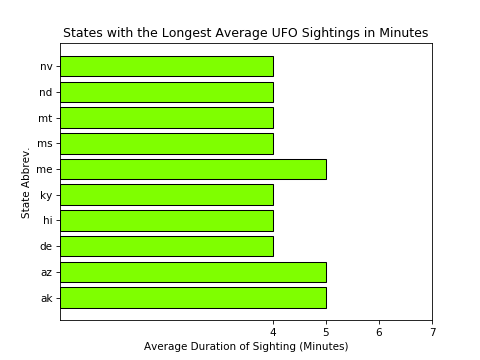

Text(0.5, 1.0, 'States with the Longest Average UFO Sightings in Minutes')

In [158]:
#plot the bar chart

#create x axis
duration = top_states["average duration (mins)"]
#create y axis
states = top_states["state"]

#bar chart formatting
#plt.figure(figsize=(20, 25))
plt.barh(states, duration,color="chartreuse",edgecolor="black")
plt.yticks(states, states)
plt.xticks(np.arange(min(duration), max(duration)+3, 1.0))
plt.savefig("Resources/bar_chart_states.png")
plt.xlabel("Average Duration of Sighting (Minutes)")
plt.ylabel("State Abbrev.")
plt.title("States with the Longest Average UFO Sightings in Minutes")